
#Data Analysis and Skewness

This notebook demonstrates the process of normalizing skewed data using the Yeo–Johnson transformation. We will apply this transformation to a dataset with skewed features, handle missing values, and visualize the results to show the reduction in skewness.



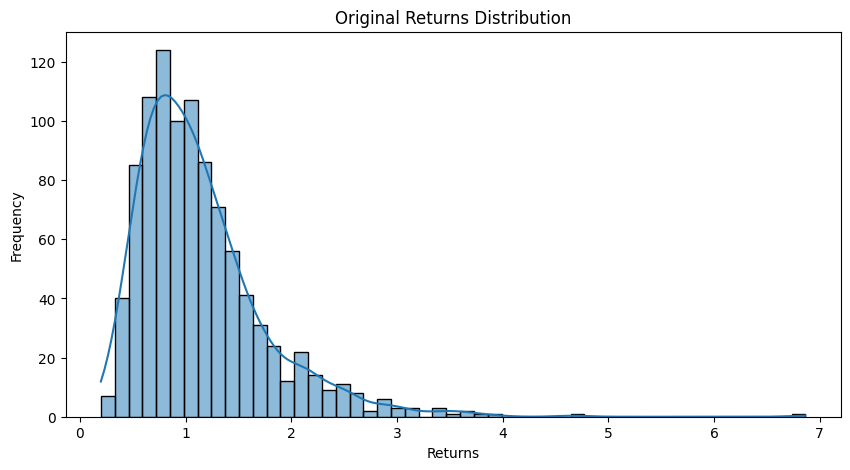

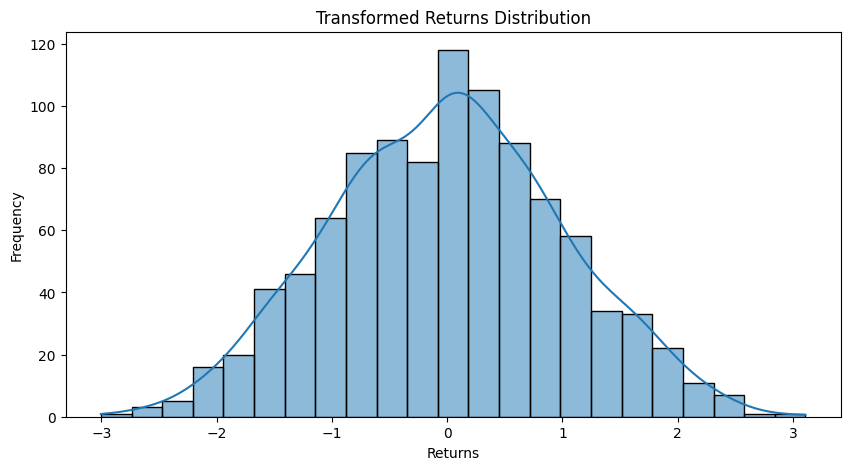

Skewness before transformation:
2020-01-01   NaN
2020-01-02   NaN
2020-01-03   NaN
2020-01-04   NaN
2020-01-05   NaN
              ..
2022-09-22   NaN
2022-09-23   NaN
2022-09-24   NaN
2022-09-25   NaN
2022-09-26   NaN
Freq: D, Name: returns, Length: 1000, dtype: float64

Skewness after transformation:
2020-01-01   NaN
2020-01-02   NaN
2020-01-03   NaN
2020-01-04   NaN
2020-01-05   NaN
              ..
2022-09-22   NaN
2022-09-23   NaN
2022-09-24   NaN
2022-09-25   NaN
2022-09-26   NaN
Freq: D, Name: returns_transformed, Length: 1000, dtype: float64


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, StandardScaler
from scipy.stats import skew

# Set a seed for reproducibility
np.random.seed(42)

# Generate a time series of financial returns
data_size = 1000
dates = pd.date_range(start='2020-01-01', periods=data_size, freq='D')
returns = pd.Series(np.random.lognormal(mean=0, sigma=0.5, size=data_size), index=dates)

# Introduce some missing values
returns.loc[::50] = np.nan

# Convert to DataFrame for easier manipulation
financial_data = returns.to_frame(name='returns')

# Visualize the original data
plt.figure(figsize=(10, 5))
sns.histplot(financial_data['returns'], kde=True)
plt.title('Original Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('yeo_johnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())  # optional
])

# Fit and transform the data
X_transformed = pipeline.fit_transform(financial_data)

# Convert to DataFrame for easier visualization
X_transformed_df = pd.DataFrame(X_transformed, index=financial_data.index, columns=['returns_transformed'])

# Visualize the transformed data
plt.figure(figsize=(10, 5))
sns.histplot(X_transformed_df['returns_transformed'], kde=True)
plt.title('Transformed Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness before and after transformation
skewness_before = financial_data['returns'].apply(skew)
skewness_after = X_transformed_df['returns_transformed'].apply(skew)

print("Skewness before transformation:")
print(skewness_before)
print("\nSkewness after transformation:")
print(skewness_after)



## Explanation of Normalizing Skewed Data with Yeo–Johnson Transformation

The **Yeo–Johnson transformation** extends the work of George Box and David Cox, who introduced a continuous family of power transforms indexed by **λ** in 1964. This transformation automates the search for an optimal power, stabilizing variance and normalizing data through systematic estimation of **λ**.

### Mathematical Definition


The Yeo–Johnson transform for a real-valued input $x$ and parameter $\lambda$ is defined as follows:

For $\lambda \neq 0$:
- If $x \geq 0$:
  $y = \frac{((x + 1)^\lambda - 1)}{\lambda}$
- If $x < 0$:
  $y = -\frac{((-x + 1)^{2 - \lambda} - 1)}{(2 - \lambda)}$

For $\lambda = 0$:
- If $x \geq 0$:
  $y = \log(x + 1)$
- If $x < 0$:
  $y = -\log(-x + 1)$

Here, $y$ is the transformed value. The parameter $\lambda$ is chosen by maximum-likelihood estimation to make the transformed data as close to Gaussian as possible.

### Key Benefits and Applications

The Yeo–Johnson transformation addresses challenges in skewed data by:

- **Handling Large Outliers**: Compressing extreme values.
- **Stabilizing Variance**: Reducing heteroscedasticity.
- **Achieving Normality**: Making skewed distributions more symmetric.
- **Meeting Model Assumptions**: Helping linear models satisfy the requirement of normal residuals.

### Yeo–Johnson vs. StandardScaler

Unlike **StandardScaler**, which centers data to zero mean and scales to unit variance without altering the distribution shape, **Yeo–Johnson**:

- **Transforms** the distribution to reduce skew.
- **Handles** zero and negative values natively.
- **Prepares** data for algorithms assuming near-normality, improving convergence and inference quality.

### Conclusion

Integrating Yeo–Johnson into your ML pipeline—after imputation and before optional standardization—ensures your models see features that are well-scaled and distributionally appropriate for robust learning.

